# Rule-Based Credit Scoring Demo
This notebook demonstrates a simple rule-based credit scoring system using the provided synthetic dataset.

In [3]:
# Import required libraries
import pandas as pd
import numpy as np

In [4]:
# Load the dataset
df = pd.read_csv('./credit_scoring_dataset.csv')
df.head()

,ID,Age,Income,Employment_Status,Loan_Amount,Loan_Purpose,Credit_History,Debt_to_Income,Num_Open_Accounts,Num_Delinquencies,Residence_Type,Marital_Status,Education,Default
0,1,34,55000,Employed,12000,Car,Good,0.25,4,0,Own,Married,Bachelor,0
1,2,45,72000,Self-Employed,20000,Home Improvement,Fair,0.32,6,1,Rent,Married,Master,0
2,3,29,43000,Employed,8000,Personal,Good,0.18,3,0,Own,Single,Bachelor,0
3,4,52,90000,Employed,25000,Debt Consolidation,Excellent,0.28,7,0,Own,Married,PhD,0
4,5,38,61000,Unemployed,10000,Medical,Poor,0.40,5,2,Rent,Divorced,High School,1


## Rule-Based Scoring Logic
We will assign points based on the following rules:
- Age: 25-60 (+1)
- Income > 50,000 (+1)
- Employment_Status: Employed or Self-Employed (+1)
- Credit_History: Excellent (+2), Good (+1), Fair (0), Poor (-1)
- Debt_to_Income < 0.35 (+1)
- Num_Delinquencies == 0 (+1), 1 (0), >1 (-1)
- Education: Bachelor or higher (+1)
- Default: 1 (actual default, for reference only)

In [5]:
def rule_based_score(row):
    score = 0
    # Age
    if 25 <= row['Age'] <= 60:
        score += 1
    # Income
    if row['Income'] > 50000:
        score += 1
    # Employment Status
    if row['Employment_Status'] in ['Employed', 'Self-Employed']:
        score += 1
    # Credit History
    if row['Credit_History'] == 'Excellent':
        score += 2
    elif row['Credit_History'] == 'Good':
        score += 1
    elif row['Credit_History'] == 'Poor':
        score -= 1
    # Debt to Income
    if row['Debt_to_Income'] < 0.35:
        score += 1
    # Num_Delinquencies
    if row['Num_Delinquencies'] == 0:
        score += 1
    elif row['Num_Delinquencies'] > 1:
        score -= 1
    # Education
    if row['Education'] in ['Bachelor', 'Master', 'PhD']:
        score += 1
    return score

df['Rule_Score'] = df.apply(rule_based_score, axis=1)
df[['ID', 'Rule_Score', 'Default']].head(10)

,ID,Rule_Score,Default
0,1,7,0
1,2,5,0
2,3,6,0
3,4,8,0
4,5,0,1
5,6,5,0
6,7,6,0
7,8,6,0
8,9,8,0
9,10,0,1


## Score Distribution
Let's visualize the distribution of rule-based scores.

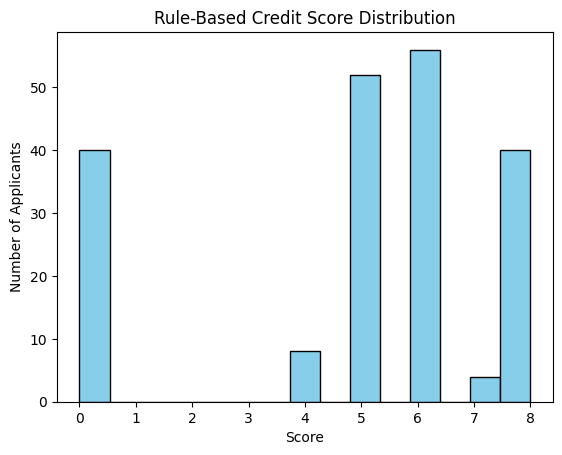

In [6]:
import matplotlib.pyplot as plt
plt.hist(df['Rule_Score'], bins=15, color='skyblue', edgecolor='black')
plt.title('Rule-Based Credit Score Distribution')
plt.xlabel('Score')
plt.ylabel('Number of Applicants')
plt.show()

## Default Rate by Score Band
Let's see how the default rate changes by score band.

/var/folders/_0/y84_kvr94qn118s0909pkzlc0000gn/T/ipykernel_46270/1317604038.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  default_rate = df.groupby('Score_Band')['Default'].mean()


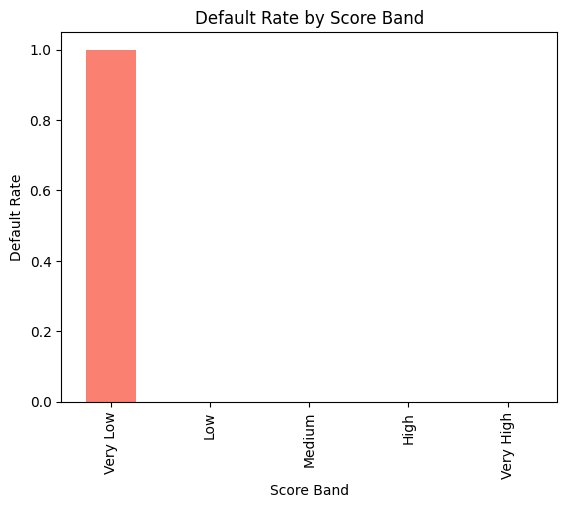

In [7]:
df['Score_Band'] = pd.cut(df['Rule_Score'], bins=[-2,2,4,6,8,10], labels=['Very Low','Low','Medium','High','Very High'])
default_rate = df.groupby('Score_Band')['Default'].mean()
default_rate.plot(kind='bar', color='salmon')
plt.title('Default Rate by Score Band')
plt.ylabel('Default Rate')
plt.xlabel('Score Band')
plt.show()

## Conclusion
This notebook demonstrated a simple rule-based credit scoring system. You can further refine the rules or compare with machine learning models for better accuracy.